<a href="https://colab.research.google.com/github/AyushmanRaha/customer_churn_prediction/blob/main/Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Setup and Exploration**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [111]:
file_path = "https://raw.githubusercontent.com/AyushmanRaha/customer_churn_prediction/refs/heads/main/customer_data.csv"
df = pd.read_csv(file_path)

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
df.shape

(7043, 21)

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [115]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Cleaning and Correction**

In [116]:
# Converting 'TotalCharges' to numeric, coercing empty strings to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges':0}, inplace=True)

In [117]:
# Checking whether the DataFrame has any null values anywhere.
has_null = df.isnull().any()
print(f"The DataFrame has null values: {has_null}")

The DataFrame has null values: customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


# **Functions and Accessory Codes**

**Dictionaries for EDA 1 analysis**

In [118]:
# Dictionary to store no. of people opting/not-opting for paperless billing
paperless_billing_counts = {
    "senior_opt_in_paperless": 0,
    "senior_opt_out_paperless": 0,
    "non_senior_opt_in_paperless": 0,
    "non_senior_opt_out_paperless": 0
}

# Dictionary to store percentage of people opting for each category
paperless_billing_percentage = {
    "senior_Opting_Percent": 0,
    "non_Senior_Opting_Percent": 0
}

# Dictionary to keep track of churning customers
customer_churn_data = {
    "senior": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    },
    "non_senior": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    }
}

# Dictionary to store the churn percentages by seniority and billing type
churn_percentages = {
    'Senior Citizens: Paperless': 0,
    'Senior Citizens: Paper': 0,
    'Non-Senior Citizens: Paperless': 0,
    'Non-Senior Citizens: Paper': 0
}

# Dictionary to store number of people opting/not-opting for paperless billing by gender
paperless_billing_counts_gender = {
    "male_opt_in_paperless": 0,      # number of male customers who opted in for paperless billing
    "male_opt_out_paperless": 0,     # number of male customers who opted out of paperless billing
    "female_opt_in_paperless": 0,    # number of female customers who opted in for paperless billing
    "female_opt_out_paperless": 0    # number of female customers who opted out of paperless billing
}

# Dictionary to store percentage of people opting for each billing method by gender
paperless_billing_percentage_gender = {
    "male_Opting_Percent": 0,        # percentage of male customers opting for paperless billing
    "female_Opting_Percent": 0       # percentage of female customers opting for paperless billing
}

# Dictionary to keep track of churning customers by gender and billing type
customer_churn_data_gender = {
    "male": {
        "churning": {
            "paperless": 0,          # male customers who churned and were on paperless billing
            "paper": 0               # male customers who churned and were on paper billing
        },
        "not_churning": {
            "paperless": 0,          # male customers who did not churn and were on paperless billing
            "paper": 0               # male customers who did not churn and were on paper billing
        }
    },
    "female": {
        "churning": {
            "paperless": 0,          # female customers who churned and were on paperless billing
            "paper": 0               # female customers who churned and were on paper billing
        },
        "not_churning": {
            "paperless": 0,          # female customers who did not churn and were on paperless billing
            "paper": 0               # female customers who did not churn and were on paper billing
        }
    }
}

# Dictionary to store the churn percentages by gender and billing type
churn_percentages_gender = {
    'Male: Paperless': 0,            # churn percentage for male customers on paperless billing
    'Male: Paper': 0,                # churn percentage for male customers on paper billing
    'Female: Paperless': 0,          # churn percentage for female customers on paperless billing
    'Female: Paper': 0               # churn percentage for female customers on paper billing
}


**Dictionaries for EDA 2 analysis**

In [119]:
# Dictionary to store how many senior/non-senior opted for which type of payment method
methodTypeCounts = {
    "senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    },
    "non_senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    }
}

# Dictionary to store how many senior/non-senior opted for which type of payment method and how many churned/not-churned after choosing
methodTypeCountsByChurn = {
    "senior": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    },
    "non_senior": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    }
}

# Dictionary to store churn percentages by seniority and payment method
methodTypeChurnPercent = {
    "senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0,
    },
    "non_senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0,
    }
}

# Dictionary to store how many male/female opted for each type of payment method
methodTypeCountsGender = {
    "male": {
        "Electronic_Check": 0,    # number of male customers who chose Electronic Check
        "Mailed_Check": 0,        # number of male customers who chose Mailed Check
        "Bank_Transfer": 0,       # number of male customers who chose Bank Transfer
        "Credit_Card": 0          # number of male customers who chose Credit Card
    },
    "female": {
        "Electronic_Check": 0,    # number of female customers who chose Electronic Check
        "Mailed_Check": 0,        # number of female customers who chose Mailed Check
        "Bank_Transfer": 0,       # number of female customers who chose Bank Transfer
        "Credit_Card": 0          # number of female customers who chose Credit Card
    }
}

# Dictionary to store how many male/female opted for each payment method and their churn status
methodTypeCountsByChurnGender = {
    "male": {
        "Churn": {
            "Electronic_Check": 0,  # male customers who churned after choosing Electronic Check
            "Mailed_Check": 0,      # male customers who churned after choosing Mailed Check
            "Bank_Transfer": 0,     # male customers who churned after choosing Bank Transfer
            "Credit_Card": 0        # male customers who churned after choosing Credit Card
        },
        "Not_Churn": {
            "Electronic_Check": 0,  # male customers who did not churn after choosing Electronic Check
            "Mailed_Check": 0,      # male customers who did not churn after choosing Mailed Check
            "Bank_Transfer": 0,     # male customers who did not churn after choosing Bank Transfer
            "Credit_Card": 0        # male customers who did not churn after choosing Credit Card
        }
    },
    "female": {
        "Churn": {
            "Electronic_Check": 0,  # female customers who churned after choosing Electronic Check
            "Mailed_Check": 0,      # female customers who churned after choosing Mailed Check
            "Bank_Transfer": 0,     # female customers who churned after choosing Bank Transfer
            "Credit_Card": 0        # female customers who churned after choosing Credit Card
        },
        "Not_Churn": {
            "Electronic_Check": 0,  # female customers who did not churn after choosing Electronic Check
            "Mailed_Check": 0,      # female customers who did not churn after choosing Mailed Check
            "Bank_Transfer": 0,     # female customers who did not churn after choosing Bank Transfer
            "Credit_Card": 0        # female customers who did not churn after choosing Credit Card
        }
    }
}

# Dictionary to store churn percentages by gender and payment method
methodTypeChurnPercentGender = {
    "male": {
        "Electronic_Check": 0,    # churn percentage for male customers on Electronic Check
        "Mailed_Check": 0,        # churn percentage for male customers on Mailed Check
        "Bank_Transfer": 0,       # churn percentage for male customers on Bank Transfer
        "Credit_Card": 0          # churn percentage for male customers on Credit Card
    },
    "female": {
        "Electronic_Check": 0,    # churn percentage for female customers on Electronic Check
        "Mailed_Check": 0,        # churn percentage for female customers on Mailed Check
        "Bank_Transfer": 0,       # churn percentage for female customers on Bank Transfer
        "Credit_Card": 0          # churn percentage for female customers on Credit Card
    }
}

**Dictionaries for EDA 3 analysis**

In [120]:
# Dictionary to store how many senior/non-senior citizens took which services
servicesBySeniorityCount = {
    "senior": {
        "Phone_Service": 0,
        "Multiple_Lines": 0,
        "Internet_Service": 0,
        "Online_Security": 0,
        "Online_Backup": 0,
        "Device_Protection": 0,
        "Tech_Support": 0,
        "Streaming_TV": 0,
        "Streaming_Movies": 0,
    },
    "non_senior": {
        "Phone_Service": 0,
        "Multiple_Lines": 0,
        "Internet_Service": 0,
        "Online_Security": 0,
        "Online_Backup": 0,
        "Device_Protection": 0,
        "Tech_Support": 0,
        "Streaming_TV": 0,
        "Streaming_Movies": 0,
    }
}
# Dictionary to store the percentage of senior/non-senior opting for a particular service.
servicesBySeniorityPercent= {
    "senior": {
        "Phone_Service": 0,
        "Multiple_Lines": 0,
        "Internet_Service": 0,
        "Online_Security": 0,
        "Online_Backup": 0,
        "Device_Protection": 0,
        "Tech_Support": 0,
        "Streaming_TV": 0,
        "Streaming_Movies": 0,
    },
    "non_senior": {
        "Phone_Service": 0,
        "Multiple_Lines": 0,
        "Internet_Service": 0,
        "Online_Security": 0,
        "Online_Backup": 0,
        "Device_Protection": 0,
        "Tech_Support": 0,
        "Streaming_TV": 0,
        "Streaming_Movies": 0,
    }
}
# Dictionary to store the churn rate for each service by seniority
serviceTypeCountByChurn = {
    "senior": {
        "Churn": {
            "Phone_Service": 0,
            "Multiple_Lines": 0,
            "Internet_Service": 0,
            "Online_Security": 0,
            "Online_Backup": 0,
            "Device_Protection": 0,
            "Tech_Support": 0,
            "Streaming_TV": 0,
            "Streaming_Movies": 0,
        },
        "Not_Churn": {
            "Phone_Service": 0,
            "Multiple_Lines": 0,
            "Internet_Service": 0,
            "Online_Security": 0,
            "Online_Backup": 0,
            "Device_Protection": 0,
            "Tech_Support": 0,
            "Streaming_TV": 0,
            "Streaming_Movies": 0,
        }
    },
    "non_senior": {
        "Churn": {
            "Phone_Service": 0,
            "Multiple_Lines": 0,
            "Internet_Service": 0,
            "Online_Security": 0,
            "Online_Backup": 0,
            "Device_Protection": 0,
            "Tech_Support": 0,
            "Streaming_TV": 0,
            "Streaming_Movies": 0,
        },
        "Not_Churn": {
            "Phone_Service": 0,
            "Multiple_Lines": 0,
            "Internet_Service": 0,
            "Online_Security": 0,
            "Online_Backup": 0,
            "Device_Protection": 0,
            "Tech_Support": 0,
            "Streaming_TV": 0,
            "Streaming_Movies": 0,
        }
    }
}

# Dictionary to store how many male/female customers took which services
servicesByGenderCount = {
    "male": {
        "Phone_Service": 0,       # number of male customers who took Phone Service
        "Multiple_Lines": 0,      # number of male customers who took Multiple Lines
        "Internet_Service": 0,    # number of male customers who took Internet Service
        "Online_Security": 0,     # number of male customers who took Online Security
        "Online_Backup": 0,       # number of male customers who took Online Backup
        "Device_Protection": 0,   # number of male customers who took Device Protection
        "Tech_Support": 0,        # number of male customers who took Tech Support
        "Streaming_TV": 0,        # number of male customers who took Streaming TV
        "Streaming_Movies": 0     # number of male customers who took Streaming Movies
    },
    "female": {
        "Phone_Service": 0,       # number of female customers who took Phone Service
        "Multiple_Lines": 0,      # number of female customers who took Multiple Lines
        "Internet_Service": 0,    # number of female customers who took Internet Service
        "Online_Security": 0,     # number of female customers who took Online Security
        "Online_Backup": 0,       # number of female customers who took Online Backup
        "Device_Protection": 0,   # number of female customers who took Device Protection
        "Tech_Support": 0,        # number of female customers who took Tech Support
        "Streaming_TV": 0,        # number of female customers who took Streaming TV
        "Streaming_Movies": 0     # number of female customers who took Streaming Movies
    }
}

# Dictionary to store the percentage of male/female customers opting for each service
servicesByGenderPercent = {
    "male": {
        "Phone_Service": 0,       # percentage of male customers opting for Phone Service
        "Multiple_Lines": 0,      # percentage of male customers opting for Multiple Lines
        "Internet_Service": 0,    # percentage of male customers opting for Internet Service
        "Online_Security": 0,     # percentage of male customers opting for Online Security
        "Online_Backup": 0,       # percentage of male customers opting for Online Backup
        "Device_Protection": 0,   # percentage of male customers opting for Device Protection
        "Tech_Support": 0,        # percentage of male customers opting for Tech Support
        "Streaming_TV": 0,        # percentage of male customers opting for Streaming TV
        "Streaming_Movies": 0     # percentage of male customers opting for Streaming Movies
    },
    "female": {
        "Phone_Service": 0,       # percentage of female customers opting for Phone Service
        "Multiple_Lines": 0,      # percentage of female customers opting for Multiple Lines
        "Internet_Service": 0,    # percentage of female customers opting for Internet Service
        "Online_Security": 0,     # percentage of female customers opting for Online Security
        "Online_Backup": 0,       # percentage of female customers opting for Online Backup
        "Device_Protection": 0,   # percentage of female customers opting for Device Protection
        "Tech_Support": 0,        # percentage of female customers opting for Tech Support
        "Streaming_TV": 0,        # percentage of female customers opting for Streaming TV
        "Streaming_Movies": 0     # percentage of female customers opting for Streaming Movies
    }
}

# Dictionary to store how many male/female customers churned or stayed after taking each service
serviceTypeCountByChurnGender = {
    "male": {
        "Churn": {
            "Phone_Service": 0,       # male customers who churned after taking Phone Service
            "Multiple_Lines": 0,      # male customers who churned after taking Multiple Lines
            "Internet_Service": 0,    # male customers who churned after taking Internet Service
            "Online_Security": 0,     # male customers who churned after taking Online Security
            "Online_Backup": 0,       # male customers who churned after taking Online Backup
            "Device_Protection": 0,   # male customers who churned after taking Device Protection
            "Tech_Support": 0,        # male customers who churned after taking Tech Support
            "Streaming_TV": 0,        # male customers who churned after taking Streaming TV
            "Streaming_Movies": 0     # male customers who churned after taking Streaming Movies
        },
        "Not_Churn": {
            "Phone_Service": 0,       # male customers who did not churn after taking Phone Service
            "Multiple_Lines": 0,      # male customers who did not churn after taking Multiple Lines
            "Internet_Service": 0,    # male customers who did not churn after taking Internet Service
            "Online_Security": 0,     # male customers who did not churn after taking Online Security
            "Online_Backup": 0,       # male customers who did not churn after taking Online Backup
            "Device_Protection": 0,   # male customers who did not churn after taking Device Protection
            "Tech_Support": 0,        # male customers who did not churn after taking Tech Support
            "Streaming_TV": 0,        # male customers who did not churn after taking Streaming TV
            "Streaming_Movies": 0     # male customers who did not churn after taking Streaming Movies
        }
    },
    "female": {
        "Churn": {
            "Phone_Service": 0,       # female customers who churned after taking Phone Service
            "Multiple_Lines": 0,      # female customers who churned after taking Multiple Lines
            "Internet_Service": 0,    # female customers who churned after taking Internet Service
            "Online_Security": 0,     # female customers who churned after taking Online Security
            "Online_Backup": 0,       # female customers who churned after taking Online Backup
            "Device_Protection": 0,   # female customers who churned after taking Device Protection
            "Tech_Support": 0,        # female customers who churned after taking Tech Support
            "Streaming_TV": 0,        # female customers who churned after taking Streaming TV
            "Streaming_Movies": 0     # female customers who churned after taking Streaming Movies
        },
        "Not_Churn": {
            "Phone_Service": 0,       # female customers who did not churn after taking Phone Service
            "Multiple_Lines": 0,      # female customers who did not churn after taking Multiple Lines
            "Internet_Service": 0,    # female customers who did not churn after taking Internet Service
            "Online_Security": 0,     # female customers who did not churn after taking Online Security
            "Online_Backup": 0,       # female customers who did not churn after taking Online Backup
            "Device_Protection": 0,   # female customers who did not churn after taking Device Protection
            "Tech_Support": 0,        # female customers who did not churn after taking Tech Support
            "Streaming_TV": 0,        # female customers who did not churn after taking Streaming TV
            "Streaming_Movies": 0     # female customers who did not churn after taking Streaming Movies
        }
    }
}

# Mapping each service an index value
service_column_mapping = {
    1: 'Phone_Service',
    2: 'Multiple_Lines',
    3: 'Internet_Service',
    4: 'Online_Security',
    5: 'Online_Backup',
    6: 'Device_Protection',
    7: 'Tech_Support',
    8: 'Streaming_TV',
    9: 'Streaming_Movies'
}

**Functions used for EDA 1 analysis**

In [121]:
def billingCountChurnCount():
  for seniority, paperless, churn in zip(df['SeniorCitizen'], df['PaperlessBilling'], df['Churn']):

    if seniority==1 and paperless=='Yes':
      paperless_billing_counts["senior_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["senior"]["churning"]["paperless"]+=1
      else:
        customer_churn_data["senior"]["not_churning"]["paperless"]+=1

    if seniority==1 and paperless=='No':
      paperless_billing_counts["senior_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["senior"]["churning"]["paper"]+=1
      else:
        customer_churn_data["senior"]["not_churning"]["paper"]+=1

    if seniority==0 and paperless=='Yes':
      paperless_billing_counts["non_senior_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["non_senior"]["churning"]["paperless"]+=1
      else:
        customer_churn_data["non_senior"]["not_churning"]["paperless"]+=1

    if seniority==0 and paperless=='No':
      paperless_billing_counts["non_senior_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["non_senior"]["churning"]["paper"]+=1
      else:
        customer_churn_data["non_senior"]["not_churning"]["paper"]+=1

#For genders
def billingCountChurnCountGender():
  for gender, paperless, churn in zip(df['gender'], df['PaperlessBilling'], df['Churn']):

    if gender=="male" and paperless=='Yes':
      paperless_billing_counts_gender["male_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Male"]["churning"]["paperless"]+=1
      else:
        customer_churn_data_gender["Male"]["not_churning"]["paperless"]+=1

    if gender=="male" and paperless=='No':
      paperless_billing_counts_gender["male_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Male"]["churning"]["paper"]+=1
      else:
        customer_churn_data_gender["Male"]["not_churning"]["paper"]+=1

    if gender=="female" and paperless=='Yes':
      paperless_billing_counts_gender["female_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Female"]["churning"]["paperless"]+=1
      else:
        customer_churn_data_gender["Female"]["not_churning"]["paperless"]+=1

    if gender=="female" and paperless=='No':
      paperless_billing_counts_gender["female_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Female"]["churning"]["paper"]+=1
      else:
        customer_churn_data_gender["Female"]["not_churning"]["paper"]+=1


**Functions used for EDA 2 Analysis**

In [122]:
def countingCategoriesChurn(seniority, payment, churn):
  if seniority==1 and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Credit_Card"]+=1

  if seniority==1 and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Credit_Card"]+=1

  if seniority==0 and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Credit_Card"]+=1

  if seniority==0 and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Credit_Card"]+=1

def countingCategories(seniority, payment):
  if seniority==1 and payment=='Electronic check':
    methodTypeCounts["senior"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Mailed check':
    methodTypeCounts["senior"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)':
    methodTypeCounts["senior"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Credit card (automatic)':
    methodTypeCounts["senior"]["Credit_Card"]+=1

  if seniority==0 and payment=='Electronic check':
    methodTypeCounts["non_senior"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Mailed check':
    methodTypeCounts["non_senior"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)':
    methodTypeCounts["non_senior"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Credit card (automatic)':
    methodTypeCounts["non_senior"]["Credit_Card"]+=1

#For genders
def countingCategoriesChurnGender(gender, payment, churn):
  if gender=="Male" and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurnGender["male"]["Churn"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurnGender["male"]["Not_Churn"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurnGender["male"]["Churn"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurnGender["male"]["Not_Churn"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["male"]["Churn"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["male"]["Not_Churn"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["male"]["Churn"]["Credit_Card"]+=1

  if gender=="Male" and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["male"]["Not_Churn"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurnGender["female"]["Churn"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurnGender["female"]["Not_Churn"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurnGender["female"]["Churn"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurnGender["female"]["Not_Churn"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["female"]["Churn"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["female"]["Not_Churn"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["female"]["Churn"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["female"]["Not_Churn"]["Credit_Card"]+=1

def countingCategoriesGender(gender, payment):
  if gender=="Male" and payment=='Electronic check':
    methodTypeCountsGender["male"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Mailed check':
    methodTypeCountsGender["male"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)':
    methodTypeCountsGender["male"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Credit card (automatic)':
    methodTypeCountsGender["male"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Electronic check':
    methodTypeCountsGender["female"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Mailed check':
    methodTypeCountsGender["female"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)':
    methodTypeCountsGender["female"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Credit card (automatic)':
    methodTypeCountsGender["female"]["Credit_Card"]+=1

**Functions for EDA-3 analysis**

In [123]:
def countingServices(seniority, serviceStatus, serviceNumber):
  if seniority == 1:
    if serviceStatus == 'Yes':
      servicesBySeniorityCount["senior"][service_column_mapping[serviceNumber]] += 1
    elif serviceStatus in ('Fiber optic', 'DSL'):
      servicesBySeniorityCount["senior"][service_column_mapping[serviceNumber]] += 1
  elif seniority == 0:
    if serviceStatus == 'Yes':
      servicesBySeniorityCount["non_senior"][service_column_mapping[serviceNumber]] += 1
    elif serviceStatus in ('Fiber optic', 'DSL'):
      servicesBySeniorityCount["non_senior"][service_column_mapping[serviceNumber]] += 1

def countingServiceChurn(seniority, serviceStatus, serviceNumber, churn):
  if seniority == 1:
    if serviceStatus == 'Yes':
      if churn=='Yes':
        serviceTypeCountByChurn["senior"]['Churn'][service_column_mapping[serviceNumber]] += 1
      else:
        serviceTypeCountByChurn["senior"]['Not_Churn'][service_column_mapping[serviceNumber]] += 1
  elif seniority == 0:
    if serviceStatus == 'Yes':
      if churn=='Yes':
        serviceTypeCountByChurn["non_senior"]['Churn'][service_column_mapping[serviceNumber]] += 1
      else:
        serviceTypeCountByChurn["non_senior"]['Not_Churn'][service_column_mapping[serviceNumber]] += 1

def percentServiceOpted():
  for seniority_level, service_data in servicesBySeniorityPercent.items():
    for service, count in service_data.items():
      if seniority_level == "senior":
        servicesBySeniorityPercent[seniority_level][service] = round((servicesBySeniorityCount[seniority_level][service]/ total_senior_citizens) * 100,2)
      else:
        servicesBySeniorityPercent[seniority_level][service] = round((servicesBySeniorityCount[seniority_level][service]/ total_non_senior_citizens) * 100,2)

def calculatingServicesCountChurn():
  for seniority, phoneService, multipleLines, internetService, onlineSecurity, onlineBackup, deviceProtection, techSupport, streamingTV, streamingMovies, churn  in zip(df['SeniorCitizen'], df['PhoneService'], df['MultipleLines'], df['InternetService'], df['OnlineSecurity'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies'], df['Churn']):
    countingServices(seniority, phoneService, 1)
    countingServices(seniority, multipleLines, 2)
    countingServices(seniority, internetService, 3)
    countingServices(seniority, onlineSecurity, 4)
    countingServices(seniority, onlineBackup, 5)
    countingServices(seniority, deviceProtection, 6)
    countingServices(seniority, techSupport, 7)
    countingServices(seniority, streamingTV, 8)
    countingServices(seniority, streamingMovies, 9)

    countingServiceChurn(seniority, phoneService, 1, churn)
    countingServiceChurn(seniority, multipleLines, 2, churn)
    countingServiceChurn(seniority, internetService, 3, churn)
    countingServiceChurn(seniority, onlineSecurity, 4, churn)
    countingServiceChurn(seniority, onlineBackup, 5, churn)
    countingServiceChurn(seniority, deviceProtection, 6, churn)
    countingServiceChurn(seniority, techSupport, 7, churn)
    countingServiceChurn(seniority, streamingTV, 8, churn)
    countingServiceChurn(seniority, streamingMovies, 9, churn)

#for genders
def countingServicesGender(gender, serviceStatus, serviceNumber):
  if gender == "Male":
    if serviceStatus == 'Yes':
      servicesByGenderCount["male"][service_column_mapping[serviceNumber]] += 1
    elif serviceStatus in ('Fiber optic', 'DSL'):
      servicesByGenderCount["male"][service_column_mapping[serviceNumber]] += 1
  elif gender == "Female":
    if serviceStatus == 'Yes':
      servicesByGenderCount["female"][service_column_mapping[serviceNumber]] += 1
    elif serviceStatus in ('Fiber optic', 'DSL'):
      servicesByGenderCount["female"][service_column_mapping[serviceNumber]] += 1

def countingServiceChurnGender(gender, serviceStatus, serviceNumber, churn):
  if gender == "Male":
    if serviceStatus == 'Yes':
      if churn=='Yes':
        serviceTypeCountByChurnGender["male"]['Churn'][service_column_mapping[serviceNumber]] += 1
      else:
        serviceTypeCountByChurnGender["male"]['Not_Churn'][service_column_mapping[serviceNumber]] += 1
  elif gender == "Female":
    if serviceStatus == 'Yes':
      if churn=='Yes':
        serviceTypeCountByChurnGender["female"]['Churn'][service_column_mapping[serviceNumber]] += 1
      else:
        serviceTypeCountByChurnGender["female"]['Not_Churn'][service_column_mapping[serviceNumber]] += 1

def percentServiceOptedGender():
  for gender, service_data in servicesByGenderPercent.items():
    for service, count in service_data.items():
      if gender == "male":
        servicesBySeniorityPercent[gender][service] = round((servicesByGenderCount[gender][service]/ total_male_citizens) * 100,2)
      else:
        servicesBySeniorityPercent[gender][service] = round((servicesByGenderCount[gender][service]/ total_female_citizens) * 100,2)

def calculatingServicesCountChurnGender():
  for gender, phoneService, multipleLines, internetService, onlineSecurity, onlineBackup, deviceProtection, techSupport, streamingTV, streamingMovies, churn  in zip(df['gender'], df['PhoneService'], df['MultipleLines'], df['InternetService'], df['OnlineSecurity'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies'], df['Churn']):
    countingServicesGender(gender, phoneService, 1)
    countingServicesGender(gender, multipleLines, 2)
    countingServicesGender(gender, internetService, 3)
    countingServicesGender(gender, onlineSecurity, 4)
    countingServicesGender(gender, onlineBackup, 5)
    countingServicesGender(gender, deviceProtection, 6)
    countingServicesGender(gender, techSupport, 7)
    countingServicesGender(gender, streamingTV, 8)
    countingServicesGender(gender, streamingMovies, 9)

    countingServiceChurnGender(gender, phoneService, 1, churn)
    countingServiceChurnGender(gender, multipleLines, 2, churn)
    countingServiceChurnGender(gender, internetService, 3, churn)
    countingServiceChurnGender(gender, onlineSecurity, 4, churn)
    countingServiceChurnGender(gender, onlineBackup, 5, churn)
    countingServiceChurnGender(gender, deviceProtection, 6, churn)
    countingServiceChurnGender(gender, techSupport, 7, churn)
    countingServiceChurnGender(gender, streamingTV, 8, churn)
    countingServiceChurnGender(gender, streamingMovies, 9, churn)

# **Exploratory Data Analysis**

In [124]:
# Iterating through each column of the DataFrame
for column in df.columns:
    print(f"Value Counts for '{column}':\n")

    print(df[column].value_counts(normalize=True)*100)
    print("-" * (len(column) + 24))
    print(" ")
    print(" ")

Value Counts for 'customerID':

customerID
3186-AJIEK    0.014198
7590-VHVEG    0.014198
5575-GNVDE    0.014198
8775-CEBBJ    0.014198
2823-LKABH    0.014198
                ...   
6713-OKOMC    0.014198
1452-KIOVK    0.014198
9305-CDSKC    0.014198
9237-HQITU    0.014198
7795-CFOCW    0.014198
Name: proportion, Length: 7043, dtype: float64
----------------------------------
 
 
Value Counts for 'gender':

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
------------------------------
 
 
Value Counts for 'SeniorCitizen':

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64
-------------------------------------
 
 
Value Counts for 'Partner':

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
-------------------------------
 
 
Value Counts for 'Dependents':

Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
----------------------------------
 
 
Value Counts for 'tenure':

tenure
1

EDA-1: To check the relationship between senior citizens with paperless billing, to see whether there is a bias of senior citizens opting for paperless billing. We also want to check how payment billing relates to churn.

Total number of citizens: 7043
 
Number of people opting paper/paperless billing by seniority:
---------------------------------------------
Senior Citizens: Paperless billing: 876
 
Senior Citizens: Paper billing: 266
 
Non-Senior Citizens: Paperless billing: 3295
 
Non-Senior Citizens: Paper billing: 2606
 
Total number of citizens: 0
 
Number of people opting paper/paperless billing by gender:
---------------------------------------------
Male Citizens: Paperless billing: 0
 
Male Citizens: Paper billing: 0
 
Female Citizens: Paperless billing: 0
 
Female Citizens: Paper billing: 0
 
Percentage of senior citizens opting for paperless billing: 76.71 %
Percentage of non senior citizens opting for paperless billing: 55.84 %
 
 
Seniority: Senior
---------------------------------------------
 
   Churn Status: Churning
       Billing Method: Paperless, Count: 398
       Billing Method: Paper, Count: 78
 
   Churn Status: Not Churning
       Billing Method: Paperless, Count: 478
       B

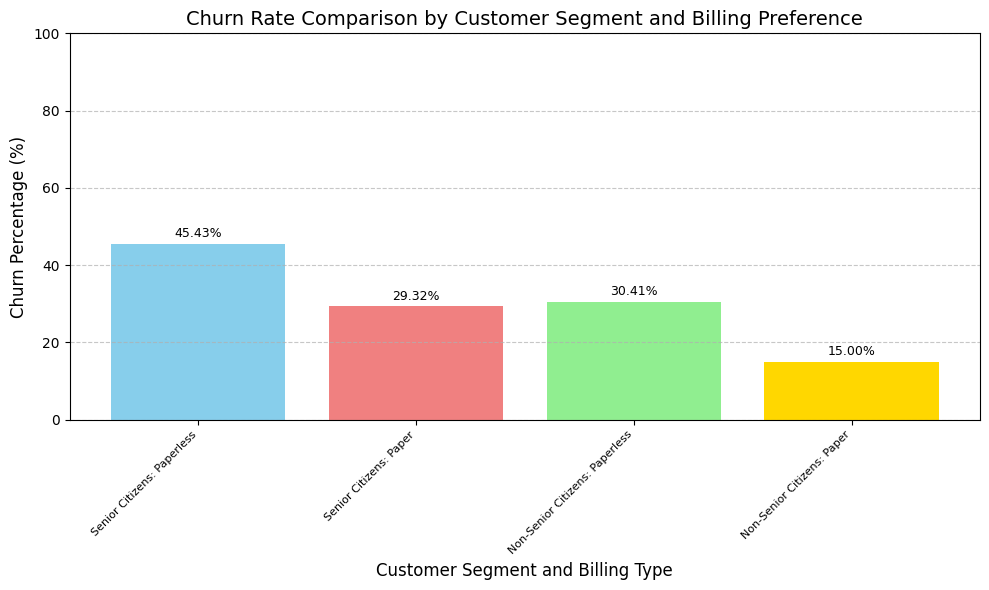

In [125]:
# Function called to calculate the above mentioned dictionaries
billingCountChurnCount()

print(f"Total number of citizens: {sum(paperless_billing_counts.values())}")
print(" ")
print("Number of people opting paper/paperless billing by seniority:")
print("-" * (len(df.columns) + 24))
print(f"Senior Citizens: Paperless billing: {paperless_billing_counts['senior_opt_in_paperless']}")
print(" ")
print(f"Senior Citizens: Paper billing: {paperless_billing_counts['senior_opt_out_paperless']}")
print(" ")
print(f"Non-Senior Citizens: Paperless billing: {paperless_billing_counts['non_senior_opt_in_paperless']}")
print(" ")
print(f"Non-Senior Citizens: Paper billing: {paperless_billing_counts['non_senior_opt_out_paperless']}")
print(" ")
#For genders
billingCountChurnCountGender()

print(f"Total number of citizens: {sum(paperless_billing_counts_gender.values())}")
print(" ")
print("Number of people opting paper/paperless billing by gender:")
print("-" * (len(df.columns) + 24))
print(f"Male Citizens: Paperless billing: {paperless_billing_counts_gender['male_opt_in_paperless']}")
print(" ")
print(f"Male Citizens: Paper billing: {paperless_billing_counts_gender['male_opt_out_paperless']}")
print(" ")
print(f"Female Citizens: Paperless billing: {paperless_billing_counts_gender['female_opt_in_paperless']}")
print(" ")
print(f"Female Citizens: Paper billing: {paperless_billing_counts_gender['female_opt_out_paperless']}")
print(" ")

def calculate_opt_in_percentage(opt_in_count, opt_out_count):
    total = opt_in_count + opt_out_count
    if total == 0:
        return 0
    return (opt_in_count / total) * 100

# Calculating the percentage of people opting for paper/paperless billing type
paperless_billing_percentage["senior_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts["senior_opt_in_paperless"],
    paperless_billing_counts["senior_opt_out_paperless"]
)

paperless_billing_percentage["non_Senior_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts["non_senior_opt_in_paperless"],
    paperless_billing_counts["non_senior_opt_out_paperless"]
)

print(f"Percentage of senior citizens opting for paperless billing: {round(paperless_billing_percentage['senior_Opting_Percent'],2)} %")
print(f"Percentage of non senior citizens opting for paperless billing: {round(paperless_billing_percentage['non_Senior_Opting_Percent'],2)} %")
print(" ")

# Printing the churn data by seniority and billing type
for seniority, churn in customer_churn_data.items():
  print(" ")
  print(f"Seniority: {seniority.replace('_', ' ').title()}")
  print("-" * (len(df.columns) + 24))
  for churn_status, billing_data in churn.items():
    print(" ")
    print(f"   Churn Status: {churn_status.replace('_', ' ').title()}")
    for billing_method, count in billing_data.items():
      print(f"       Billing Method: {billing_method.replace('_', ' ').title()}, Count: {count}")

print(" ")
print(" ")

# Calculating the churn percentages
churn_percentages["Senior Citizens: Paperless"] = round(customer_churn_data['senior']["churning"]["paperless"] / (
    customer_churn_data['senior']["churning"]["paperless"] +
    customer_churn_data['senior']["not_churning"]["paperless"]
)*100,2)

churn_percentages["Senior Citizens: Paper"] = round(customer_churn_data['senior']["churning"]["paper"] / (
    customer_churn_data['senior']["churning"]["paper"] +
    customer_churn_data['senior']["not_churning"]["paper"]
)*100,2)

churn_percentages["Non-Senior Citizens: Paperless"] = round(customer_churn_data['non_senior']["churning"]["paperless"] / (
    customer_churn_data['non_senior']["churning"]["paperless"] +
    customer_churn_data['non_senior']["not_churning"]["paperless"]
)*100,2)

churn_percentages["Non-Senior Citizens: Paper"] = round(customer_churn_data['non_senior']["churning"]["paper"] / (
    customer_churn_data['non_senior']["churning"]["paper"] +
    customer_churn_data['non_senior']["not_churning"]["paper"]
)*100,2)

# Printing the percentage of churning by seniority and billing type
print("Percentage of churning by seniority and billing type: ")
print("-" * (len(df.columns) + 24))
for category, count in churn_percentages.items():
  print(f"{category} billing - {count} %")
  print(" ")

#Now we will visualize the above data.
categories = list(churn_percentages.keys())
percentages = list(churn_percentages.values())

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.figure(figsize=(10, 6))
plt.bar(categories, percentages, color=colors)

plt.xlabel('Customer Segment and Billing Type', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.title('Churn Rate Comparison by Customer Segment and Billing Preference', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=8)

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

EDA-2: To find any relationship between senior/non-senior citizens and payment billing. Also how they correlate with churning rate.

Seniority Level: Senior
---------------------------------------------
  Payment Method: Electronic Check, Count: 594
 
  Payment Method: Mailed Check, Count: 94
 
  Payment Method: Bank Transfer, Count: 233
 
  Payment Method: Credit Card, Count: 221
 
Seniority Level: Non Senior
---------------------------------------------
  Payment Method: Electronic Check, Count: 1771
 
  Payment Method: Mailed Check, Count: 1518
 
  Payment Method: Bank Transfer, Count: 1311
 
  Payment Method: Credit Card, Count: 1301
 
 
 
Seniority Level: Senior:
---------------------------------------------
  Churn:
     Payment Method: Electronic Check: 317
 
     Payment Method: Mailed Check: 44
 
     Payment Method: Bank Transfer: 53
 
     Payment Method: Credit Card: 62
 
  Not Churn:
     Payment Method: Electronic Check: 277
 
     Payment Method: Mailed Check: 50
 
     Payment Method: Bank Transfer: 180
 
     Payment Method: Credit Card: 159
 
 
Seniority Level: Non Senior:
-------------------------

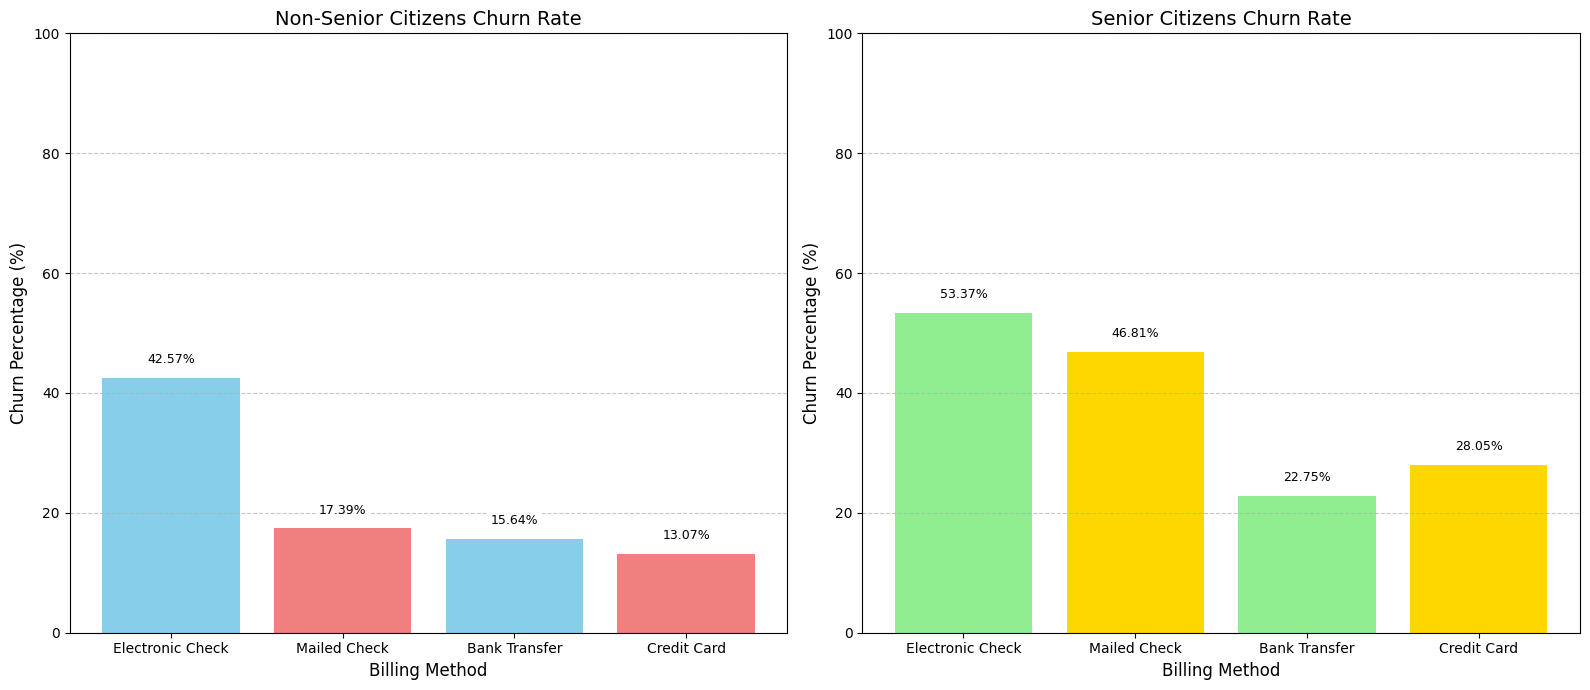

In [126]:
# Calculating the counts for each seniority and payment method
for seniority, payment, churn in zip(df['SeniorCitizen'], df['PaymentMethod'], df['Churn']):
  countingCategoriesChurn(seniority, payment, churn)
  countingCategories(seniority, payment)
# Printing no. of counts for each seniority and payment method
for seniority_level, payment_types in methodTypeCounts.items():
    print(f"Seniority Level: {seniority_level.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, count in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Count: {count}")
        print(" ")

print(" ")
# Printing no. of counts by seniority, churn and payment method

for senior_status, churn_data in methodTypeCountsByChurn.items():
    print(" ")
    print(f"Seniority Level: {senior_status.replace('_', ' ').title()}:")
    print("-" * (len(df.columns) + 24))
    for churn_status, method_data in churn_data.items():
        print(f"  {churn_status.replace('_', ' ').title()}:")
        for method, count in method_data.items():
            print(f"     Payment Method: {method.replace('_', ' ').title()}: {count}")
            print(" ")

#Calculating the percentage of churn by seniority and payment method

for seniority_level, payment_types in methodTypeChurnPercent.items():
    for payment_method, count in payment_types.items():
        methodTypeChurnPercent[seniority_level][payment_method] = round((
              methodTypeCountsByChurn[seniority_level]["Churn"][payment_method] /
              (
                methodTypeCountsByChurn[seniority_level]["Churn"][payment_method] +
                methodTypeCountsByChurn[seniority_level]["Not_Churn"][payment_method]
              )
            ) * 100,2)

for seniority_level, payment_types in methodTypeChurnPercent.items():
    print(f"Seniority Level: {seniority_level.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, churn_percentage in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Churn Percentage: {churn_percentage}%")
        print(" ")


# Visualising the above data using Matplotlib Bar graph

methodTypeList1 = list(methodTypeCounts['non_senior'].keys())
ChurnPercentagePerMethodList1 = list(methodTypeChurnPercent['non_senior'].values())

methodTypeList2 = list(methodTypeCounts['senior'].keys())
ChurnPercentagePerMethodList2 = list(methodTypeChurnPercent['senior'].values())

for i in range(len(methodTypeList1)):
  methodTypeList1[i] = methodTypeList1[i].replace('_', ' ').title()

for i in range(len(methodTypeList2)):
  methodTypeList2[i] = methodTypeList2[i].replace('_', ' ').title()

def add_labels(ax, methodTypeList, ChurnPercentagePerMethodList):
    for i in range(len(methodTypeList)):
        ax.text(i, ChurnPercentagePerMethodList[i] + 2,
                f'{ChurnPercentagePerMethodList[i]:.2f}%',
                ha="center", va="bottom", fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

colors1 = ['skyblue', 'lightcoral'] # Colors for non-senior bars
colors2 = ['lightgreen', 'gold']   # Colors for senior bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

ax1.bar(methodTypeList1, ChurnPercentagePerMethodList1, color=colors1)
add_labels(ax1, methodTypeList1, ChurnPercentagePerMethodList1)

ax1.set_xlabel('Billing Method', fontsize=12)
ax1.set_ylabel('Churn Percentage (%)', fontsize=12)
ax1.set_title('Non-Senior Citizens Churn Rate', fontsize=14)
ax1.set_ylim(0, 100)
ax1.set_xticks(range(len(methodTypeList1)))
ax1.set_xticklabels(methodTypeList1, rotation=0, ha='center', fontsize=10)

ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(methodTypeList2, ChurnPercentagePerMethodList2, color=colors2)
add_labels(ax2, methodTypeList2, ChurnPercentagePerMethodList2)

ax2.set_xlabel('Billing Method', fontsize=12)
ax2.set_ylabel('Churn Percentage (%)', fontsize=12)
ax2.set_title('Senior Citizens Churn Rate', fontsize=14)
ax2.set_ylim(0, 100)
ax2.set_xticks(range(len(methodTypeList2)))
ax2.set_xticklabels(methodTypeList2, rotation=0, ha='center', fontsize=10)

ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

EDA-3: To check how many senior/non-senior citizens took how many services. We will also check the co-relation with churn. Here we don't consider the specific choice within the service, rather people are choosing the service in general.

In [127]:
# Calculatng the the number of senior/non-senior citizens opting for services and its churn count also.
calculatingServicesCountChurn()

#Finding the total number of senior/non-senior citizens
senior_citizen_counts = df['SeniorCitizen'].value_counts()
total_senior_citizens = senior_citizen_counts[1]
total_non_senior_citizens = senior_citizen_counts[0]
print(f"Total Senior Citizens: {total_senior_citizens}")
print(f"Total Non-Senior Citizens: {total_non_senior_citizens}")

#Finding the total number of male/female citizens
gender_counts = df['gender'].value_counts()
total_male_citizens = gender_counts[1]
total_female_citizens = gender_counts[0]
print(f"Total Male Citizens: {total_male_citizens}")
print(f"Total Female Citizens: {total_female_citizens}")

# Calculating what percentage of people opted for the following service in that particular demographic.
percentServiceOpted()

# Printing seniority, type of service and its count
for seniority, service_type in servicesBySeniorityCount.items():
    print(" ")
    print(f"Seniority Level: {seniority.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for service, count in service_type.items():
        print(f"  Service Type: {service.replace('_', ' ').title()}, Count: {count}")
        print(" ")

# Printing seniority, churn for each service type
for senior_status, churn_data in serviceTypeCountByChurn.items():
    print(" ")
    print(f"Seniority Level: {senior_status.replace('_', ' ').title()}:")
    print("-" * (len(df.columns) + 24))
    for churn_status, service_data in churn_data.items():
        print(f"  {churn_status.replace('_', ' ').title()}:")
        print(" ")
        for service, count in service_data.items():
            print(f"     Service Type: {service.replace('_', ' ').title()}: {count}")
            print(" ")

# Printing seniority and what percentage of it opted that particular service
for seniority, service_type in servicesBySeniorityPercent.items():
    print(" ")
    print(f"Seniority Level: {seniority.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for service, count in service_type.items():
        print(f"  Percentage of citizens opted: {service.replace('_', ' ').title()}: {count} %")
        print(" ")

Total Senior Citizens: 1142
Total Non-Senior Citizens: 5901
Total Male Citizens: 3488
Total Female Citizens: 3555
 
Seniority Level: Senior
---------------------------------------------
  Service Type: Phone Service, Count: 1038
 
  Service Type: Multiple Lines, Count: 665
 
  Service Type: Internet Service, Count: 1090
 
  Service Type: Online Security, Count: 282
 
  Service Type: Online Backup, Count: 476
 
  Service Type: Device Protection, Count: 466
 
  Service Type: Tech Support, Count: 260
 
  Service Type: Streaming Tv, Count: 572
 
  Service Type: Streaming Movies, Count: 595
 
 
Seniority Level: Non Senior
---------------------------------------------
  Service Type: Phone Service, Count: 5323
 
  Service Type: Multiple Lines, Count: 2306
 
  Service Type: Internet Service, Count: 4427
 
  Service Type: Online Security, Count: 1737
 
  Service Type: Online Backup, Count: 1953
 
  Service Type: Device Protection, Count: 1956
 
  Service Type: Tech Support, Count: 1784
 
  Ser

/tmp/ipython-input-647805639.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_male_citizens = gender_counts[1]
/tmp/ipython-input-647805639.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_female_citizens = gender_counts[0]


EDA-4: To check which contract types have the maximum tenure and how it co-relates to churn.